<a href="https://colab.research.google.com/github/matheusapostulo/lung-cancer-machine-learning/blob/main/Lung_Cancer_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libs 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# Data Exploration and Visualization 

In [183]:
# Reading the csv diretcly from csv in my github
url = 'https://raw.githubusercontent.com/matheusapostulo/lung-cancer-machine-learning/main/survey%20lung%20cancer.csv'
lung_df = pd.read_csv(url)


In [184]:
lung_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [185]:
lung_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [186]:
lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [187]:
# df rows and columns 
print(f"Rows= {len(lung_df)} ")
print(f"Columns= {len(lung_df.columns)} ")

Rows= 309 
Columns= 16 


## Duplicated Rows

In [188]:
#Checking duplicated rows - There are 33 duplicated rows
lung_df.duplicated().sum()

33

In [189]:
#New df without duplicaded rows
new_lung_df = lung_df.drop_duplicates()

In [190]:
# Checking duplicated rows in new df - Now, there is 0 duplicated rows
new_lung_df.duplicated().sum()

0

In [191]:
# new df rows and columns 
shape = new_lung_df.shape
print(f"Rows= {shape[0]}")
print(f"Columns= {shape[1]}")

Rows= 276
Columns= 16


Afterwards, we'll train the algorithms with both df to get the highest possible accuracy

## Missing values

In [192]:
#Ckecking missing values - There is not missing values
lung_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

## Outliers

In [193]:
# Function for find outliers at the dataframe. This function shows and returns.
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   if len(outliers) > 0 and ((df.max() + df.min())/2 != 0.5) :
      print(f'{df.name} have {len(outliers)} possibles outlier! Max_valor = {df.max()} | Min_valor = {df.min()}')
      return df.name   

In [194]:
# Testing "find_outliers_IQR" in all dataset columns
# Defining a list for all columns
all_columns = lung_df.iloc[:, 1:15]

# Defining a list for all columns that've outliers
all_columns_outliers = []
# Calling the function with all columns
for i in all_columns:
 outlier = find_outliers_IQR(lung_df[i])
 if outlier != None:
  all_columns_outliers.append(outlier)
 
all_columns_outliers

AGE have 2 possibles outlier! Max_valor = 87 | Min_valor = 21


['AGE']

In [195]:
# Showing the outliers in graph form
fig = px.box(lung_df, y='AGE')
fig.show()

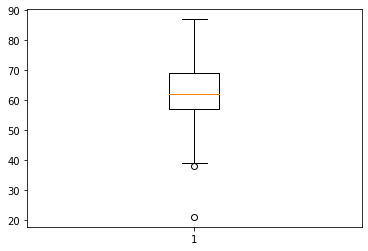

In [196]:
plt.figure()
plt.boxplot(lung_df.AGE)
plt.show()

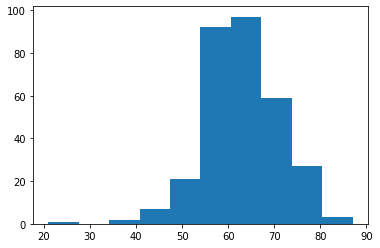

In [197]:
plt.hist(x = lung_df['AGE']);

Therefore, we can realize that this is not an outlier, it's just a representation of age, which can vary quite a bit.

## Visualizing Data

***2 = YES***   
***1 = NO*** 

In [198]:
cols = list(lung_df.columns)
cols_df = cols[1:]
cols_df

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

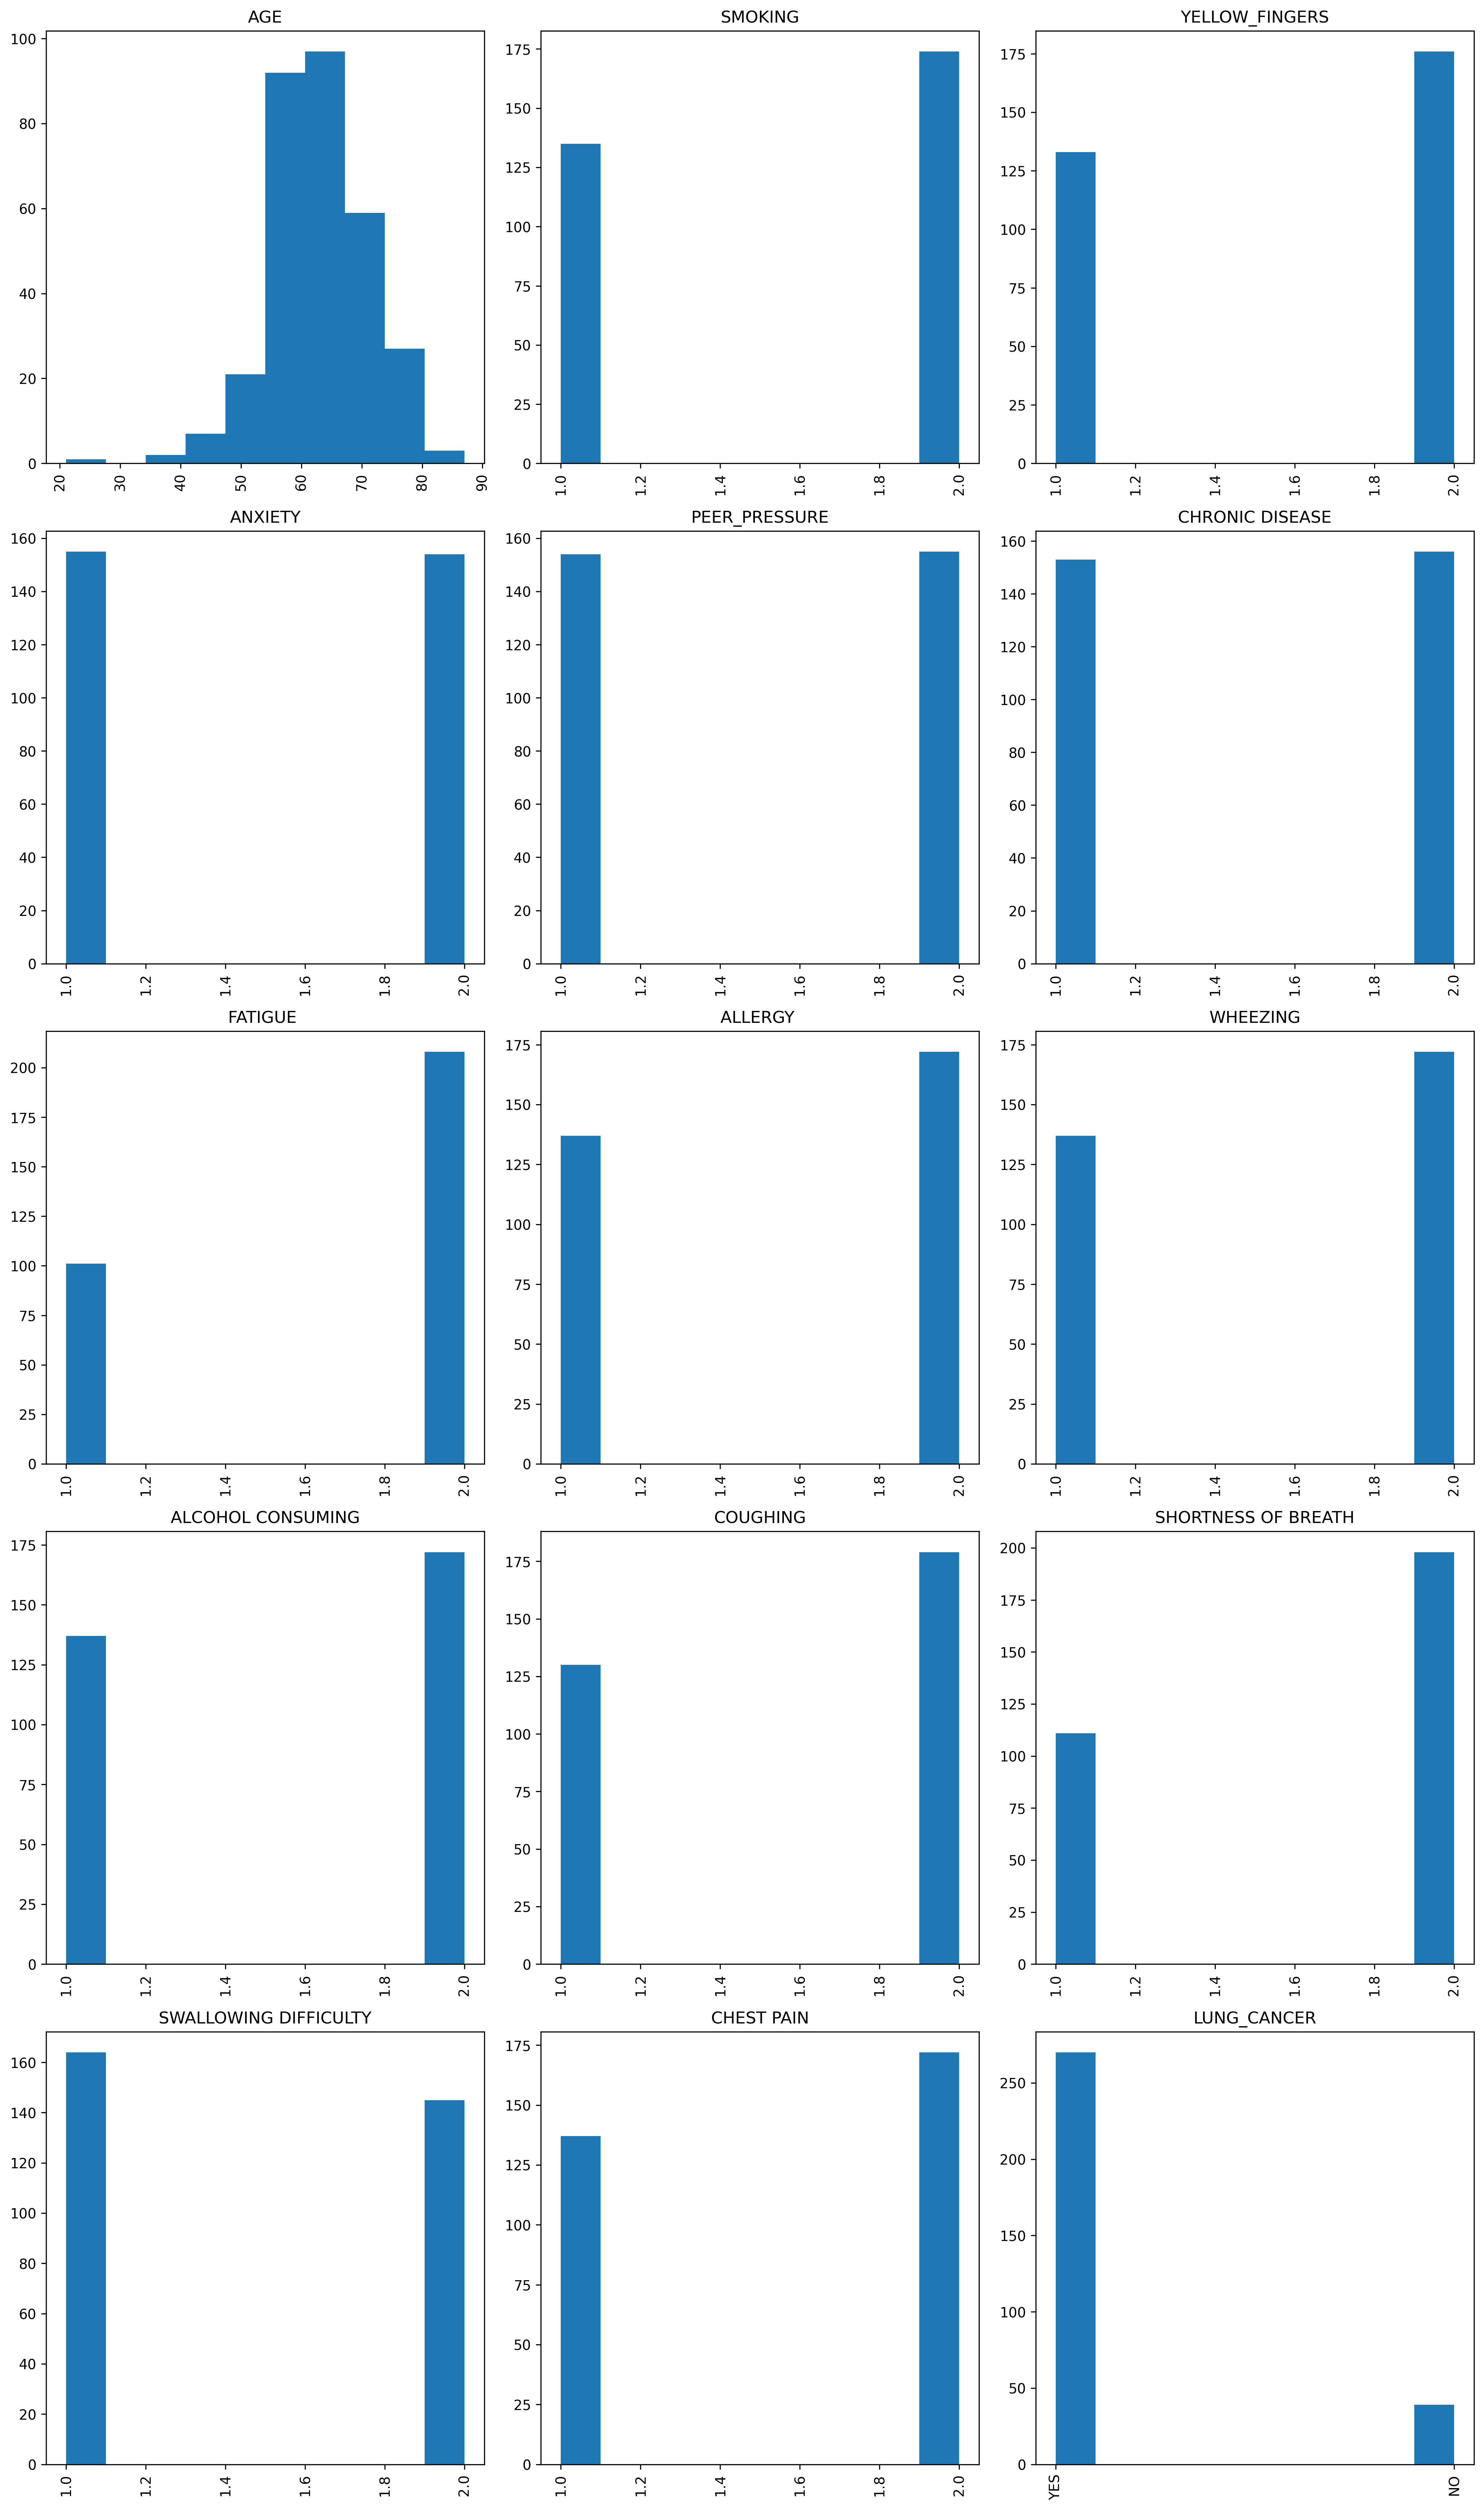

In [199]:
# Show all features values
plt.figure(figsize = (15,40), dpi = 300)
for i in range(len(cols_df)):
  plt.subplot(8,3,i+1)
  plt.title(cols_df[i])
  plt.xticks(rotation=90)
  plt.hist(lung_df[cols_df[i]])

plt.tight_layout()

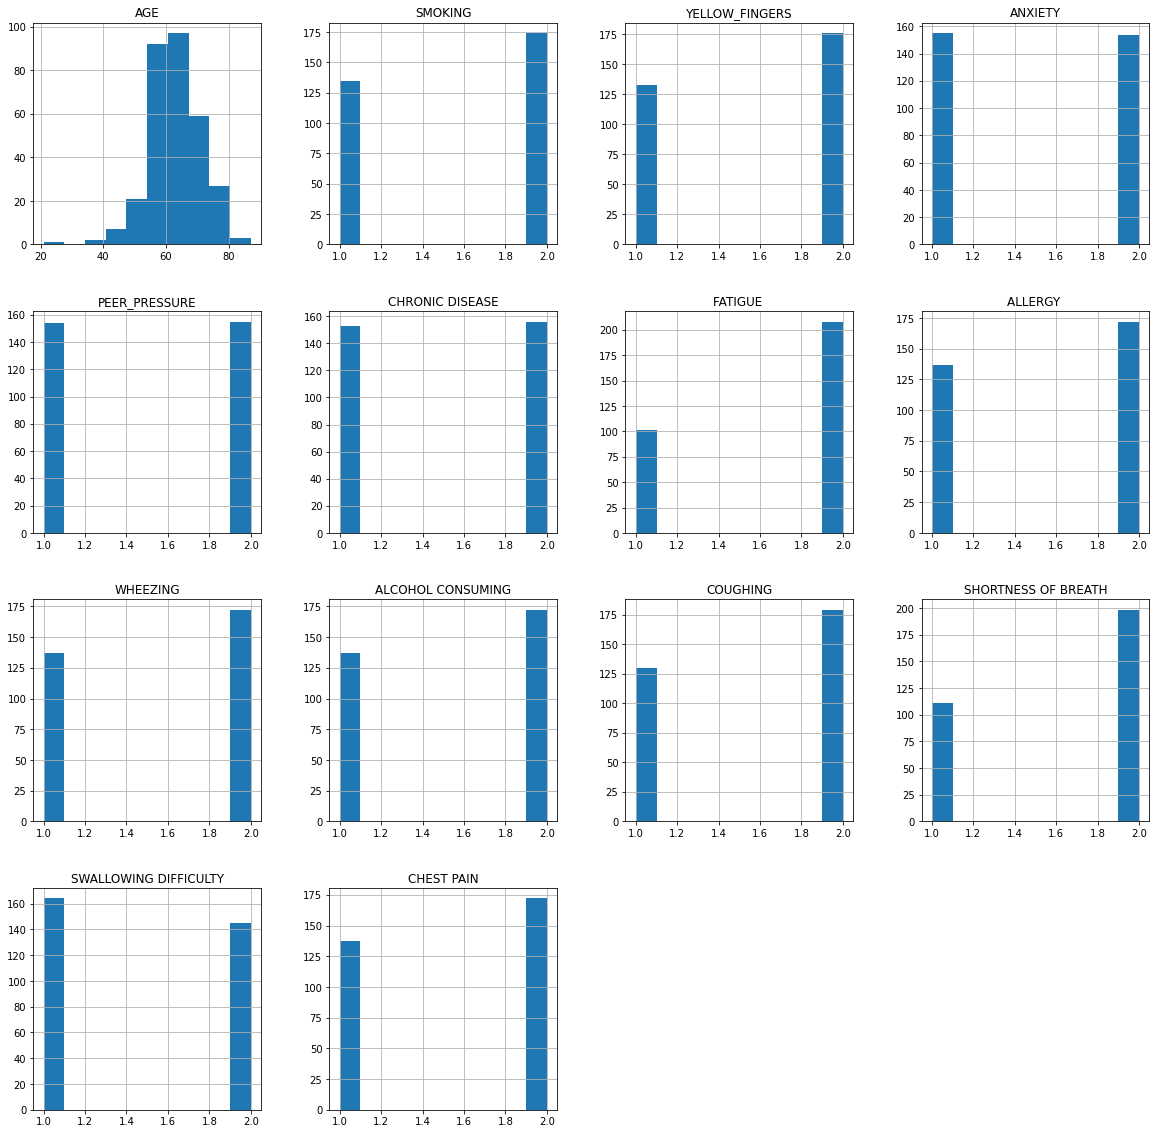

In [200]:
lung_df.hist(figsize=(20,20));

# Predictors and Classes


In [221]:
x_lung = lung_df.iloc[:, 0:15].values

In [222]:
x_lung

array([[2, 69, 1, ..., 2, 2, 2],
       [2, 74, 2, ..., 2, 2, 2],
       [1, 59, 1, ..., 2, 1, 2],
       ...,
       [2, 58, 2, ..., 1, 1, 2],
       [2, 67, 2, ..., 2, 1, 2],
       [2, 62, 1, ..., 1, 2, 1]], dtype=object)

In [223]:
y_lung = lung_df.iloc[:, 15].values

In [224]:
y_lung

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YE

## Transform Gender

In [253]:
## Transform Gender
lung_df.GENDER[lung_df['GENDER'] == 'M'] = 2
lung_df.GENDER[lung_df['GENDER'] == 'F'] = 1

new_lung_df.GENDER[new_lung_df['GENDER'] == 'M'] = 2
new_lung_df.GENDER[new_lung_df['GENDER'] == 'F'] = 1

<ipython-input-253-ec161d2e7a9b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-253-ec161d2e7a9b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-253-ec161d2e7a9b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [254]:
lung_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [208]:
new_lung_df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Split of bases into training and testing

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
x_lung_training, x_lung_test, y_lung_training, y_lung_test = train_test_split(x_lung, y_lung, test_size=0.15, random_state=0)

In [257]:
x_lung_training.shape

(262, 15)

In [258]:
y_lung_training.shape

(262,)

In [259]:
x_lung_test.shape

(47, 15)

In [260]:
y_lung_test.shape

(47,)

## Save Variables

In [244]:
import pickle

In [264]:
with open('lung.pkl', mode = 'wb') as f:
  pickle.dump([x_lung_training, y_lung_training, x_lung_test, y_lung_test],f)

# BAYES ALGORITHM - 87.23% (WITHOUT SCALING)


In [331]:
with open('lung.pkl', 'rb') as f:
  x_lung_training, y_lung_training, x_lung_test, y_lung_test = pickle.load(f)

In [332]:
from sklearn.naive_bayes import GaussianNB

In [333]:
naive_lung = GaussianNB()

In [334]:
naive_lung.fit(x_lung_training, y_lung_training)

GaussianNB()

In [335]:
predictions_lung = naive_lung.predict(x_lung_test)

In [336]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_lung_test,predictions_lung)

0.8723404255319149

# RANDOM FOREST - 97.87%

In [322]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
with open('lung.pkl', 'rb') as f:
  x_lung_training, y_lung_training, x_lung_test, y_lung_test = pickle.load(f)

In [324]:
random_forest_lung = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=0)
random_forest_lung.fit(x_lung_training,y_lung_training)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [325]:
predictions_forest_lung = random_forest_lung.predict(x_lung_test)

In [326]:
predictions_forest_lung

array(['YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES'],
      dtype=object)

In [327]:
y_lung_test

array(['YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES'],
      dtype=object)

In [328]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_lung_test,predictions_forest_lung)

0.9787234042553191

0.9787234042553191

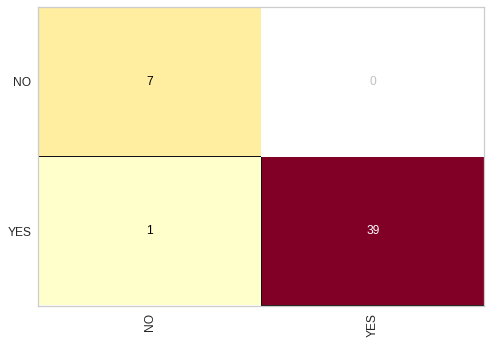

In [329]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_lung)
cm.fit(x_lung_training, y_lung_training) #Treinamento
cm.score(x_lung_test, y_lung_test) #Teste

In [330]:
print(classification_report(y_lung_test, predictions_forest_lung))

              precision    recall  f1-score   support

          NO       0.88      1.00      0.93         7
         YES       1.00      0.97      0.99        40

    accuracy                           0.98        47
   macro avg       0.94      0.99      0.96        47
weighted avg       0.98      0.98      0.98        47

